In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize']=20,5

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
electricitytimeseries = pd.read_csv('Electric_Production.csv',header=0,index_col=0)

In [5]:
electricitytimeseries.shape

(397, 1)

In [7]:
electricitytimeseries.head(20)

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151
06-01-1985,58.0904
07-01-1985,62.6202
08-01-1985,63.2485
09-01-1985,60.5846


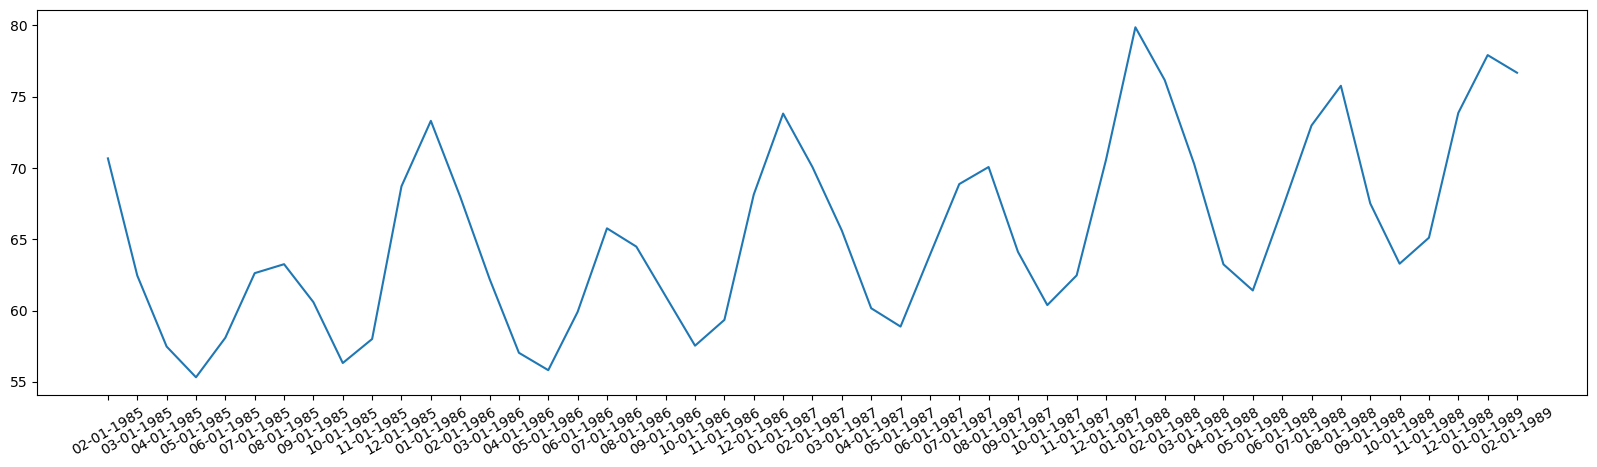

In [10]:
plt.plot(electricitytimeseries[1:50]['Value'])
plt.xticks(rotation=30)
plt.show()

In [11]:
rollingseries = electricitytimeseries[1:50].rolling(window=5)
rollingmean = rollingseries.mean()
print(rollingmean.head(10))

               Value
DATE                
02-01-1985       NaN
03-01-1985       NaN
04-01-1985       NaN
05-01-1985       NaN
06-01-1985  60.79982
07-01-1985  59.18946
08-01-1985  59.34912
09-01-1985  59.97176
10-01-1985  60.17182
11-01-1985  60.15384


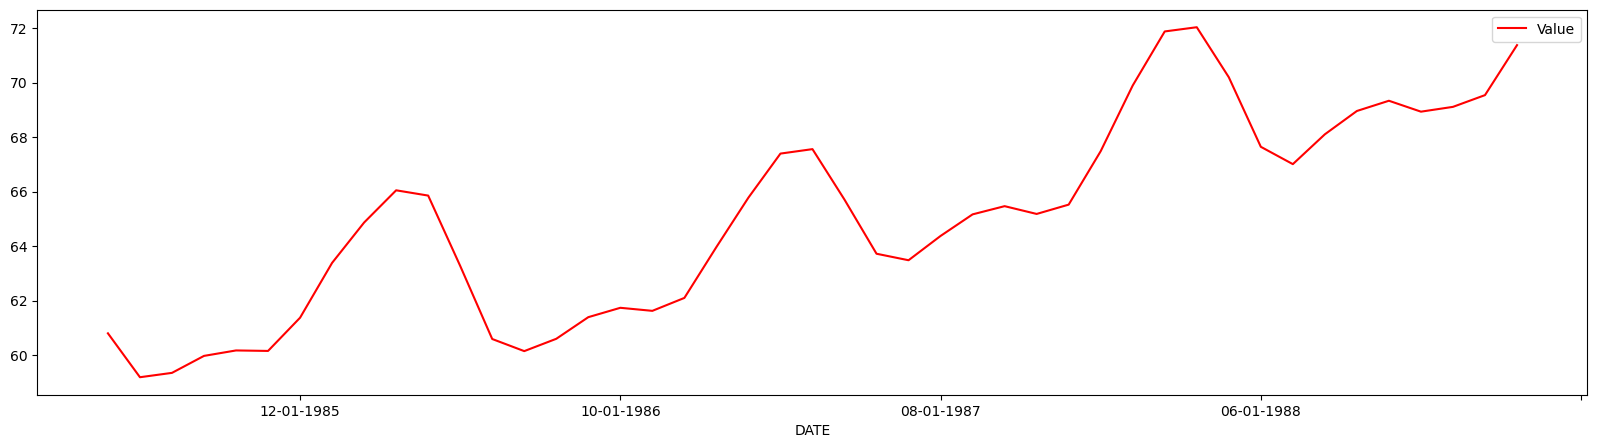

In [14]:
rollingmean.plot(color='red')
plt.show()

In [24]:
rollingseries = electricitytimeseries[1:50].rolling(window=10)
rollingmean = rollingseries.mean()

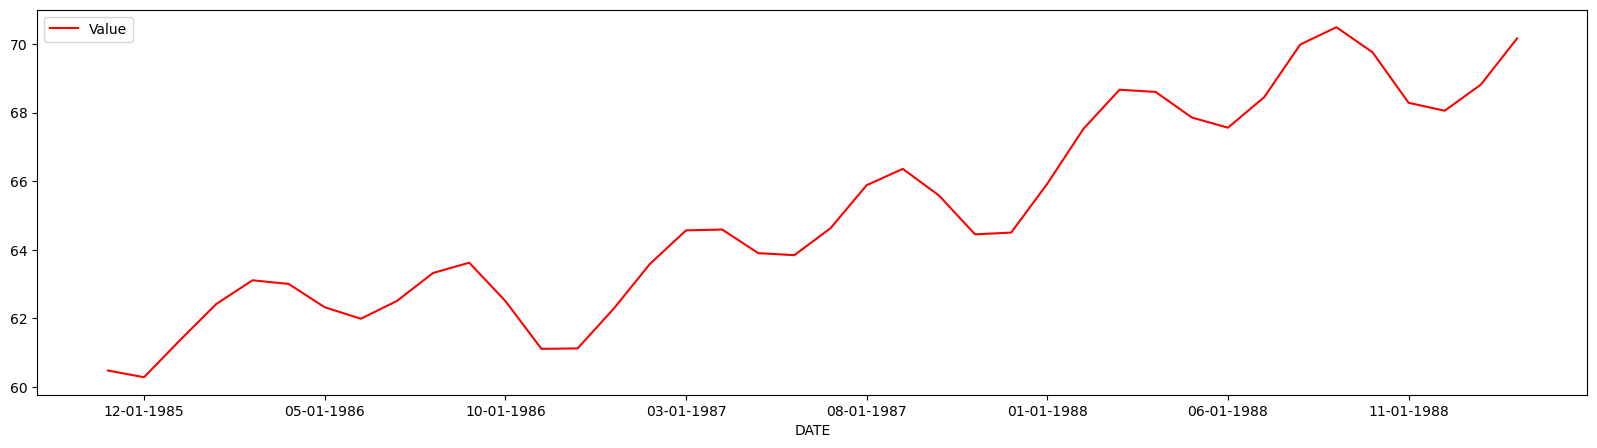

In [25]:
rollingmean.plot(color='red')
plt.show()

### Simple exponential smoothing

In [17]:
data = electricitytimeseries[1:50]
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

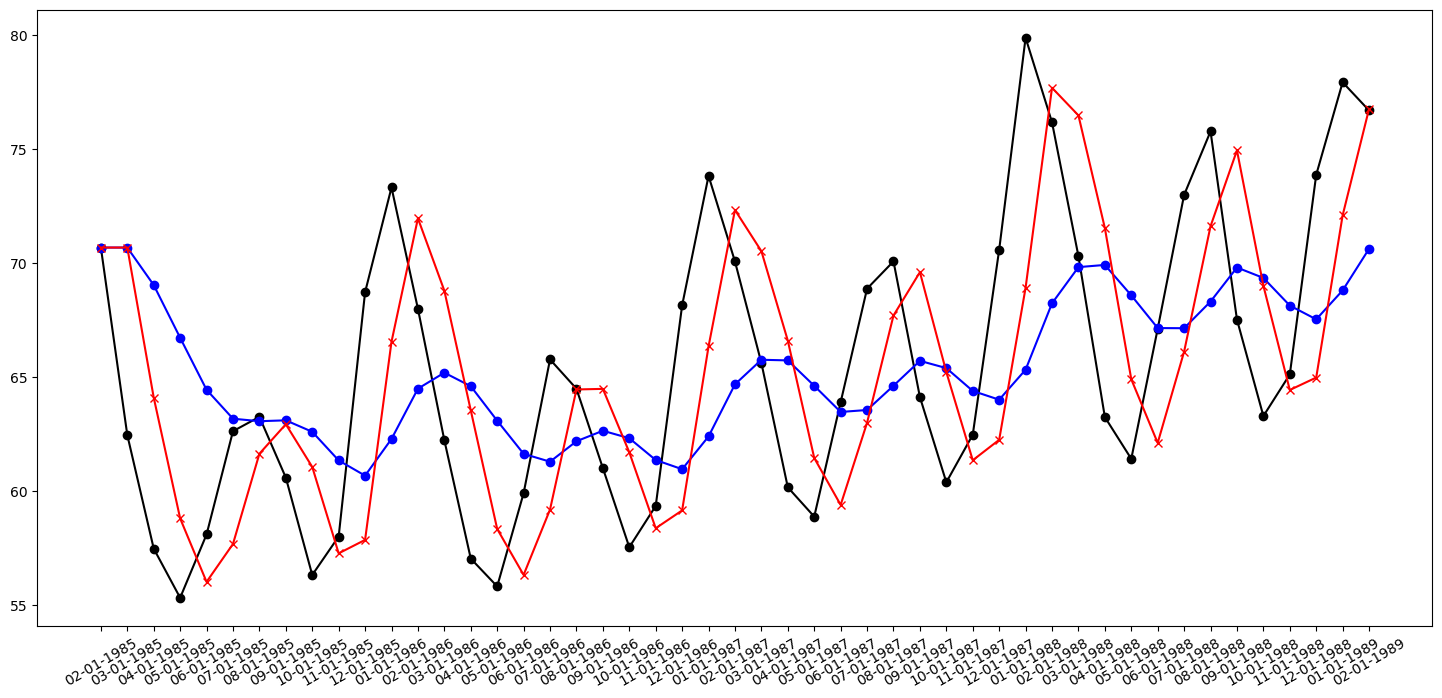

In [18]:
plt.figure(figsize=(18,8))
plt.plot(electricitytimeseries[1:50],marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='x', color='red')
plt.show()

In [19]:
fit1 = Holt(data).fit() #linear trend
fit2 = Holt(data,exponential=True).fit() #exponential trend

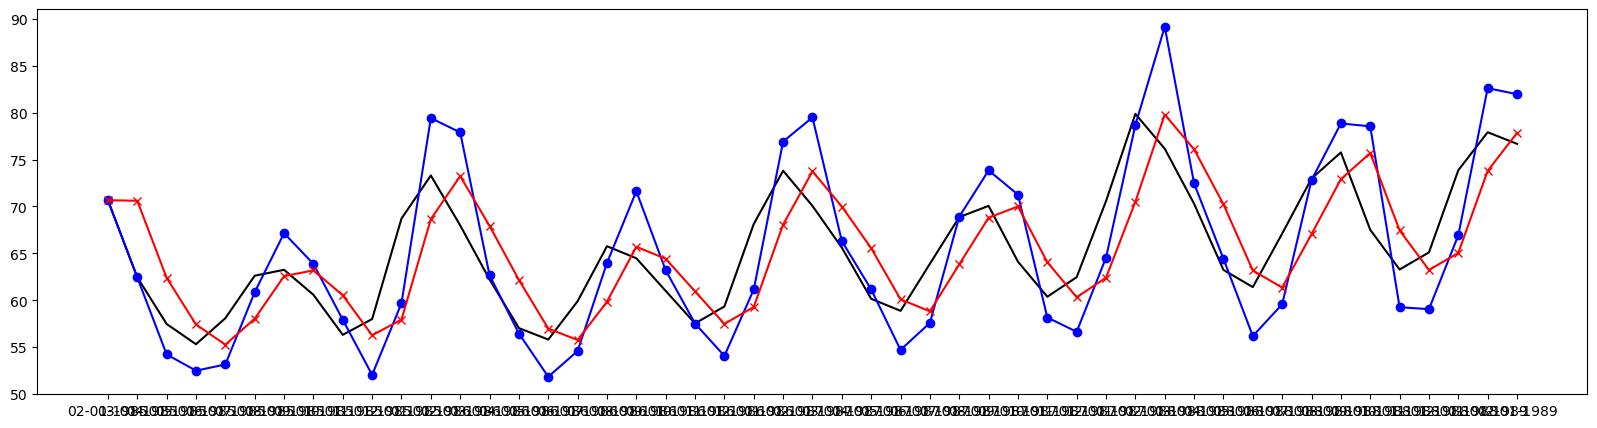

In [21]:
plt.plot(electricitytimeseries[1:50],color='black')
plt.plot(fit1.fittedvalues,marker='o',color='blue')
plt.plot(fit2.fittedvalues,marker='x',color='red')
plt.show()